# N-Grams

In [124]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.util import ngrams
from nltk.tokenize import sent_tokenize
import english_words

tokenizer = nltk.RegexpTokenizer(r"\w+")

In [31]:
kept_words = english_words.get_english_words_set(['web2'], lower=True)

In [35]:
kept_words

{'iapetus',
 'bustle',
 'isographically',
 'urucuri',
 'skokomish',
 'neuropsychopathy',
 'minnesinger',
 'pukateine',
 'unconceivably',
 'arioian',
 'denitrificator',
 'zincite',
 'reconduct',
 'impudent',
 'frostweed',
 'bacon',
 'lumbago',
 'unjoking',
 'licinian',
 'jurel',
 'misemploy',
 'nonintelligence',
 'succeeding',
 'russophobe',
 'tympany',
 'uptrend',
 'preracing',
 'besauce',
 'diatomaceae',
 'ecotypic',
 'wonder',
 'diagredium',
 'pedagogically',
 'sawed',
 'aerofoil',
 'impest',
 'graped',
 'trolling',
 'adry',
 'bibb',
 'uncontemplated',
 'chalcedonian',
 'tetraster',
 'ellipse',
 'bleachground',
 'storting',
 'bleaky',
 'manipulatively',
 'casquet',
 'pyrophosphate',
 'unadvisedness',
 'newberyite',
 'footed',
 'triphyletic',
 'unforestalled',
 'featherpate',
 'wattmeter',
 'erect',
 'deossify',
 'tritoxide',
 'whoa',
 'beefishness',
 'esperantist',
 'silver',
 'cabaret',
 'americanizer',
 'wit',
 'clarify',
 'unoriginativeness',
 'advection',
 'autovivisection',
 'no

In [6]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/marioberaha/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [66]:
fnames = nltk.corpus.gutenberg.fileids()
all_bigrams = []
for file in fnames:
    text = nltk.corpus.gutenberg.raw(file).lower()
    sentences = sent_tokenize(text)
    tokens_raw = [tokenizer.tokenize(t) for t in sentences]
    tokens = list(map(
        lambda sent: list(filter(lambda x: x in kept_words, sent)), 
        tokens_raw))
    bigrams = [ngrams(t, 2) for t in tokens]
    bigrams = np.concatenate([[ ' '.join(grams) for grams in bigrams[i]] for i in range(len(bigrams))])
    all_bigrams.extend(bigrams)   

In [73]:
with open("../data/bigram_text.txt", "w") as fp:
    fp.write("\n".join(all_bigrams))

In [95]:
all_bigrams = np.array(all_bigrams)

indexes = np.unique(all_bigrams, return_index=True)[1]
bigram_dict = [all_bigrams[index] for index in sorted(indexes)]

w2id = {w: i for (i, w) in enumerate(bigram_dict)}
bigram_idxs = list(map(w2id.get, all_bigrams))

#bigram_dict, bigram_idxs = np.unique(all_bigrams, return_index=True)

In [99]:
with open("../data/bigram_dict.txt", "w") as fp:
    fp.write("\n".join(bigram_dict))

In [105]:
df = pd.DataFrame(bigram_idxs)
df.to_csv("../data/bigram_idx.csv", index=False)

In [87]:
np.unique(all_bigrams)

array(['a a', 'a account', 'a after', ..., 'zoological were',
       'zoology and', 'zoology is'], dtype='<U31')

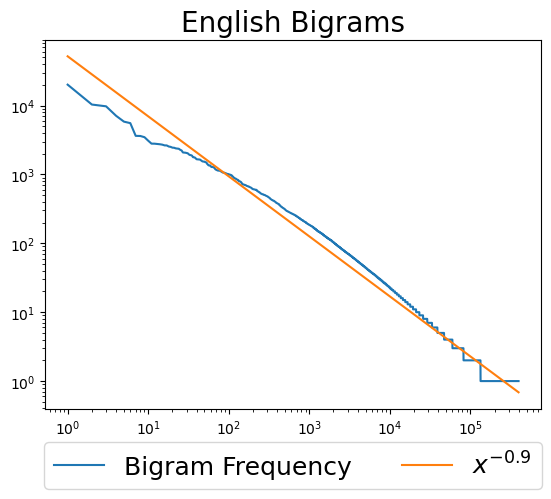

In [190]:
idx, cnts = np.unique(bigram_idxs, return_counts=True)
sorted_cnts = sorted(cnts)[::-1]

plt.plot(np.arange(1, len(cnts) + 1), sorted_cnts, label="Bigram Frequency")

logcnts = np.log(sorted_cnts)
logx = np.log(np.arange(1, len(cnts) + 1))
a, b = np.polyfit(logx, logcnts, 1)
plt.plot(np.exp(logx), np.exp(logx)**a * np.exp(b), label="$x^{-0.9}$")

plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=18, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.title("English Bigrams", fontsize=20)
plt.savefig("../plots/bigrams_frequency.pdf", bbox_inches="tight")

In [193]:
len(np.unique(bigram_idxs))

397403

In [157]:
a

-0.8710283611752919

# DNA Data

In [116]:
with open("../data/covid_dna.txt", "r") as fp:
    dnaseqs = fp.read().split(",")

In [118]:
all_seqs = np.array(dnaseqs)

indexes = np.unique(all_seqs, return_index=True)[1]
seq_dict = [dnaseqs[index] for index in sorted(indexes)]

seq2id = {s: i for (i, s) in enumerate(seq_dict)}
dna_idxs = list(map(seq2id.get, all_seqs))

In [121]:
len(seq_dict)

77274

In [120]:
with open("../data/dna_seq_dict.txt", "w") as fp:
    fp.write("\n".join(seq_dict))
    
df = pd.DataFrame(dna_idxs)
df.to_csv("../data/dna_idx.csv", index=False)

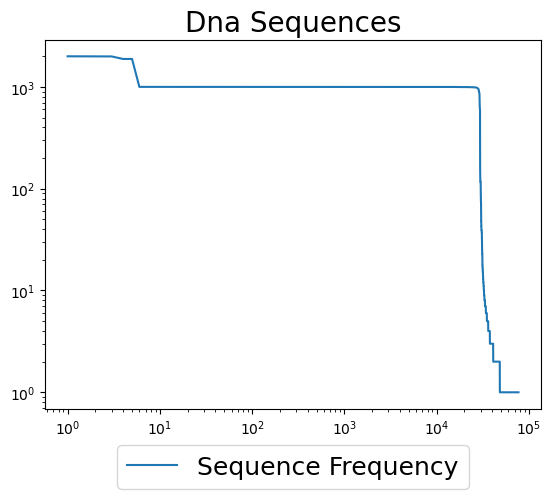

In [188]:
idx, cnts = np.unique(dna_idxs, return_counts=True)

plt.plot(np.arange(1, len(cnts) + 1), sorted(cnts)[::-1], label="Sequence Frequency")
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=18, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.25))
plt.title("Dna Sequences", fontsize=20)
plt.savefig("../plots/dna_frequency.pdf", bbox_inches="tight")

In [191]:
idx, cnts = np.unique(dna_idxs, return_counts=True)

sorted(cnts)[::-1]

[1997,
 1995,
 1991,
 1880,
 1880,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,

In [192]:
len(cnts)

77274

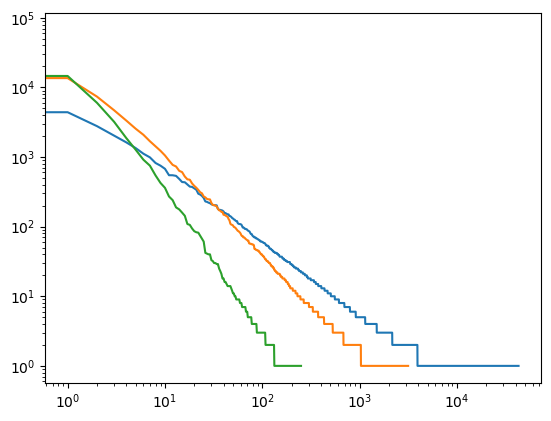

In [135]:
data = np.random.zipf(1.1, 100000)

idx, cnts = np.unique(data, return_counts=True)
plt.plot(sorted(cnts)[::-1])

data = np.random.zipf(1.5, 100000)
idx, cnts = np.unique(data, return_counts=True)
plt.plot(sorted(cnts)[::-1])

data = np.random.zipf(2.2, 100000)
idx, cnts = np.unique(data, return_counts=True)
plt.plot(sorted(cnts)[::-1])

plt.yscale("log")
plt.xscale("log")

In [182]:
data = np.random.zipf(2.2, 1000000)

idx, cnts = np.unique(data, return_counts=True)
sorted_cnts = sorted(cnts)[::-1]

logcnts = np.log(sorted_cnts)
logx = np.log(np.arange(1, len(cnts) + 1))
a, b = np.polyfit(logx, logcnts, 1)

In [183]:
a

-1.9790941099322839